In [1]:
import numpy as np
import mylibrary.nnlib as tnn

import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from ipywidgets import interactive

import copy

In [2]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

x, y = twospirals(400)
x, y = x/10, y.reshape(-1)
xx, yy = np.array(x), np.reshape(y, (-1,1))
print(x.shape, y.shape)

(800, 2) (800,)


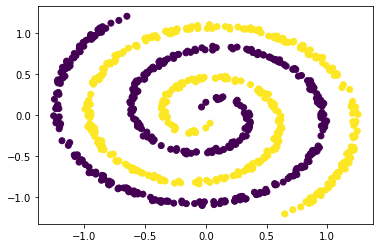

In [3]:
x1 = xx[:,0]
x2 = xx[:,1]

%matplotlib inline
plt.scatter(x1, x2, c=y)

## Network Shape Heuristics

In [4]:
%matplotlib inline

columns=['a','b','c']
data = np.cumsum(np.random.rand(10,3),axis=1)
df = pd.DataFrame(data,columns=columns)

def g(x,y):
    plt.scatter(df[x], df[y])
    plt.show()

interactive_plot = interactive(g, x=columns, y=columns)
interactive_plot

interactive(children=(Dropdown(description='x', options=('a', 'b', 'c'), value='a'), Dropdown(description='y',…

In [5]:
%matplotlib inline
# from ipywidgets import 

# xx = np.linspace(0, 1, 10)

# x = np.array([0,0.5,1]).reshape(-1,1)
# xmat = np.hstack((x**2, x**1, x**0))

# xmat
# ymat = np.array([1,2,1.]).reshape(-1,1)
# W = np.linalg.inv(xmat)@ymat
# newx = 0.3
# newxmat = np.array([newx**2, newx, 1]).reshape(1,-1)
# newy = newxmat@W
# newy

# ymat = np.array([1,2,1.]).reshape(-1,1)
# W = np.linalg.pinv(xmat)@ymat
# newxmat = np.array([xx**2, xx**1, xx**0]).T
# # newxmat
# newy = newxmat@W
# newy

def quadratic(i, o, l, y):
    
    xx = np.arange(start=0, stop=l+1)
    xxx = np.linspace(0, l, num=200)
#     print(xx.shape)

    x = np.array([0,l/2,l]).reshape(-1,1)
    xmat = np.hstack((x**2, x**1, x**0))

    
#     ymat = np.array([i,y*(i+2*o)/3,o]).reshape(-1,1)
    ymat = np.array([i,y*(i+o)/2,o]).reshape(-1,1)

    W = np.linalg.pinv(xmat)@ymat
    newxmat = np.array([xx**2, xx**1, xx**0]).T
    newy = newxmat@W
#     print(newxmat.shape)

#     plt.scatter(xx, newy)
    yy = np.ceil(newy-1e-2) 
    print(yy)
    plt.scatter(xx, yy)
    neurons = np.sum(yy[1:-1])
    synapses = np.sum(yy[:-1]*yy[1:])
    print(neurons, synapses, neurons/synapses)
    plt.plot(xxx, np.array([xxx**2, xxx**1, xxx**0]).T@W)
#     b, t = plt.ylim()
#     plt.ylim(0, t)
    plt.show()

interactive_plot = interactive(quadratic, i=(1,784), o=(1,10), l=(1,7), y=(1.,5.))
interactive_plot

interactive(children=(IntSlider(value=392, description='i', max=784, min=1), IntSlider(value=5, description='o…

the possible configurations changes
??condition--pervious numbers can stay same or only increase

1. First hidden layer == add simply
2. 

In [39]:
class HeuristicNetwork(object):
    
    def __init__(self, input_dim, output_dim, num_layers=1, curvature=1.0):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.num_layers = num_layers
        self.curvature = curvature
        
        if num_layers ==1:
            self.configuration = [input_dim, output_dim] 
        else:
            self.configuration = self._make_network_configuration_()
        
    def _make_network_configuration_(self,):
        xx = np.arange(start=0, stop=self.num_layers+1, dtype=np.int64)
        x = np.array([xx[0],xx[-1]/2,xx[-1]]).reshape(-1,1)
        xmat = np.hstack((x**2, x**1, x**0))
        ymat = np.array([self.input_dim,
                         self.curvature*(self.input_dim+2*self.output_dim)/3,
                         self.output_dim]).reshape(-1,1)

        W = np.linalg.pinv(xmat)@ymat
        newxmat = np.array([xx**2, xx**1, xx**0]).T
        newy = newxmat@W
        yy = np.array(np.ceil(newy-1e-2).reshape(-1), dtype=np.int64)
        return yy.tolist()
    
    def increase_layer(self):
        self.num_layers+= 1

In [40]:
hn = HeuristicNetwork(input_dim=5, output_dim=2, num_layers=2)

In [43]:
oc = hn.configuration
oc

[5, 3, 2]

In [41]:
hn.num_layers = 3
nc = hn._make_network_configuration_()
nc

[5, 4, 3, 2]

In [46]:
oc_ = oc[1:-1]
nc_ = nc[1:-1]
oc_, nc_

([3], [4, 3])

## Building Network

In [4]:
optimizer = tnn.Adam()

net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, 2, optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(2, 2, optimizer=optimizer)
layer3 = tnn.DoubleReluLinearLayer(2, 2, optimizer=optimizer)
layer4 = tnn.DoubleReluLinearLayer(2, 1, optimizer=optimizer)
sigmoid = tnn.Sigmoid()

In [5]:
%matplotlib tk

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = tnn.CrossEntropyBinary().loss(yout, yy)
        print(epoch, 'Error = ', error)
        ax.clear()
        
        out = (yout>0.5).reshape(-1)
        ax.scatter(x1, x2, c=out)
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.6882871090086924


100 Error =  0.6007914323739929


200 Error =  0.48356313029777154


300 Error =  0.36471318597928987


400 Error =  0.33771623891135844


500 Error =  0.324459330862724


600 Error =  0.3167266375218017


700 Error =  0.3130081245188905


800 Error =  0.3104863076859175


900 Error =  0.3088071664760541


TclError: invalid command name "pyimage11"